# Task 1
## Transfer Function Representation

In [1]:
import control

sys = control.TransferFunction([1], [1, 1])
print(sys)


  1
-----
s + 1



In [2]:
import control

sys = control.TransferFunction([1], [1, 1])
print(sys)
print(sys.num)
print(sys.den)


  1
-----
s + 1

[[array([1])]]
[[array([1, 1])]]


# Task 2
## First Order System

In [3]:
K = 2.5  # Gain
tau = 0.8  # Time constant

num = [K]
den = [tau, 1]
tf_first_order = control.TransferFunction(num, den)

print(tf_first_order)


   2.5
---------
0.8 s + 1



# Task 3
## Second Order System

In [4]:
K = 1.5  # Gain
zeta = 0.6  # Damping ratio
omega_n = 2  # Natural frequency

num = [K * omega_n**2]
den = [1, 2 * zeta * omega_n, omega_n**2]
tf_second_order = control.TransferFunction(num, den)

print(tf_second_order)


       6
---------------
s^2 + 2.4 s + 4



# Task 4
## Combination of Transfer Function

In [5]:
# First-order transfer function
K1 = 2.5
tau1 = 0.8
num1 = [K1]
den1 = [tau1, 1]
H1 = control.TransferFunction(num1, den1)

# Second-order transfer function
K2 = 1.5
zeta2 = 0.6
omega_n2 = 2
num2 = [K2 * omega_n2**2]
den2 = [1, 2 * zeta2 * omega_n2, omega_n2**2]
H2 = control.TransferFunction(num2, den2)

In [6]:
# Series
tf_series = control.series(H1, H2)

print("Transfer Function in Series:")
print(tf_series)

Transfer Function in Series:

              15
------------------------------
0.8 s^3 + 2.92 s^2 + 5.6 s + 4



In [7]:
# Parallel
tf_parallel = control.parallel(H1, H2)

print("\nTransfer Function in Parallel:")
print(tf_parallel)


Transfer Function in Parallel:

    2.5 s^2 + 10.8 s + 16
------------------------------
0.8 s^3 + 2.92 s^2 + 5.6 s + 4



In [8]:
# Feedback
tf_feedback = control.feedback(H1, H2)

print("\nTransfer Function in Feedback:")
print(tf_feedback)


Transfer Function in Feedback:

      2.5 s^2 + 6 s + 10
-------------------------------
0.8 s^3 + 2.92 s^2 + 5.6 s + 19



# Task 5
## State space representation

In [9]:
import control

A = [[-2, 0], [1, -1]]
B = [[1], [0]]
C = [[1, 0]]
D = [[0]]

sys_ss = control.StateSpace(A, B, C, D)

print("State-Space Representation:")
print(sys_ss)

State-Space Representation:
A = [[-2.  0.]
     [ 1. -1.]]

B = [[1.]
     [0.]]

C = [[1. 0.]]

D = [[0.]]



# Task 6
## Conversion between Transfer Function and State Space 

In [10]:
import control

num = [2]
den = [1, 3, 2]
tf = control.TransferFunction(num, den)
print("Transfer Function:")
print(tf)

A = [[-3, -2], [1, 0]]
B = [[-1], [0]]
C = [[0, -2]]
D = [[0]]
ss = control.StateSpace(A, B, C, D)
print("State Space Representation:")
print(ss)

Transfer Function:

      2
-------------
s^2 + 3 s + 2

State Space Representation:
A = [[-3. -2.]
     [ 1.  0.]]

B = [[-1.]
     [ 0.]]

C = [[ 0. -2.]]

D = [[0.]]



In [11]:
ss_from_tf = control.tf2ss(tf)
print("State Space Representation from Transfer Function:")
print(ss_from_tf)

State Space Representation from Transfer Function:
A = [[-3. -2.]
     [ 1.  0.]]

B = [[-1.]
     [ 0.]]

C = [[ 0. -2.]]

D = [[0.]]



In [12]:
tf_from_ss = control.ss2tf(ss)
print("Transfer Function from State Space Representation:")
print(tf_from_ss)

Transfer Function from State Space Representation:

      2
-------------
s^2 + 3 s + 2



# Task 7
## Control System Input Signal

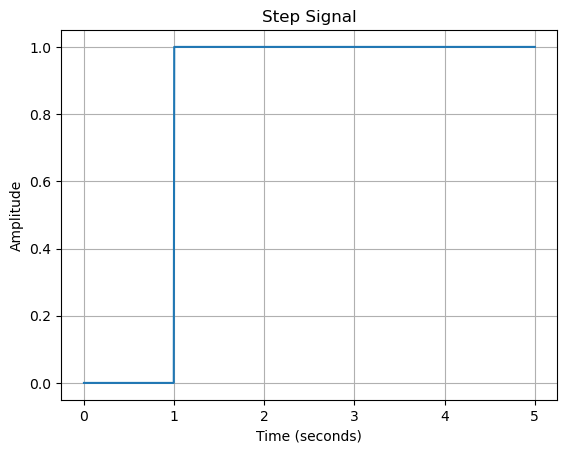

In [13]:
#Step Signal

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)

step_signal = np.ones_like(t)
step_signal[t < 1] = 0

plt.plot(t, step_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Step Signal')
plt.grid(True)
plt.show()

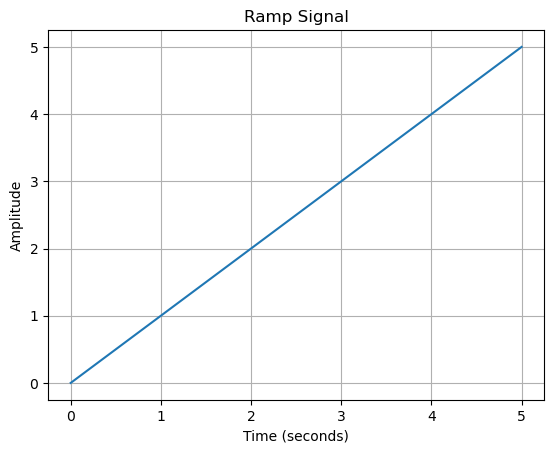

In [14]:
# Ramp Signal
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)

ramp_signal = t

plt.plot(t, ramp_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Ramp Signal')
plt.grid(True)
plt.show()

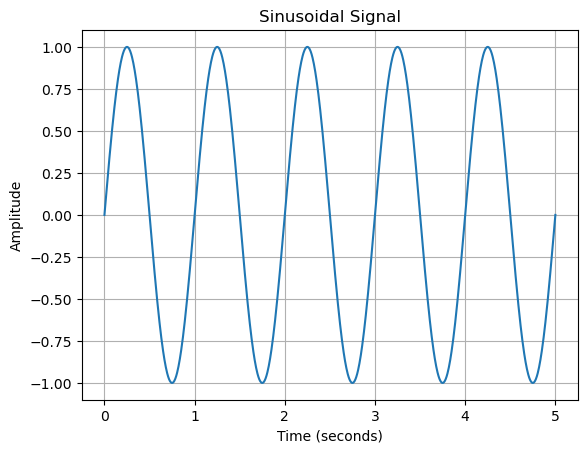

In [15]:
# Sinusoidal
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)

sinus_signal = np.sin(2 * np.pi * t)

plt.plot(t, sinus_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.grid(True)
plt.show()

# Task 8

## Output Response

In [16]:
# transfer function
import control
import numpy as np
import matplotlib.pyplot as plt

numerator = [1]  # Numerator coefficients of the transfer function
denominator = [1, 2, 1]  # Denominator coefficients of the transfer function
sys = control.TransferFunction(numerator, denominator)

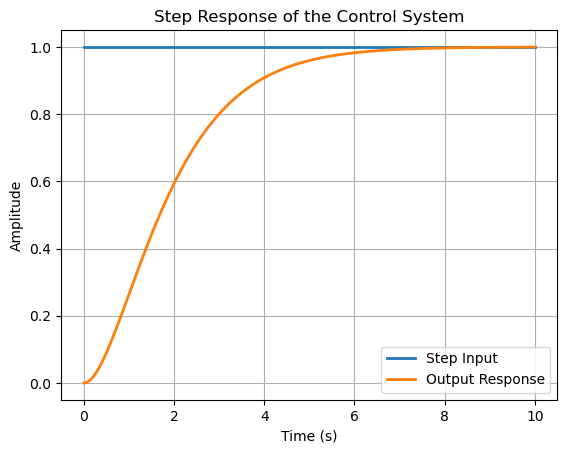

In [17]:
# Generate the step input
t_step = np.linspace(0, 10, 1000)
u_step = np.ones_like(t_step)  # Step input: u(t) = 1 for t >= 0

# Calculate the output response of the control system to the step input
t, y_step = control.step_response(sys, T=t_step)

# Plot both the input and output on one canvas
plt.plot(t_step, u_step, label='Step Input', linewidth=2)
plt.plot(t, y_step, label='Output Response', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Step Response of the Control System')
plt.legend()
plt.grid(True)
plt.show()

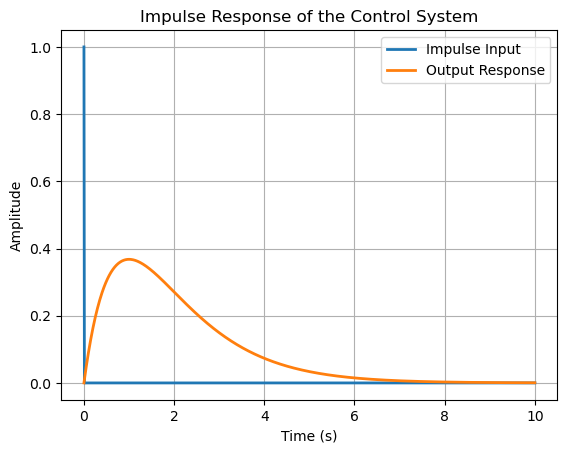

In [18]:
# Generate the impulse input (impulse at t=0)
t_impulse = np.linspace(0, 10, 1000)
u_impulse = np.zeros_like(t_impulse)
u_impulse[0] = 1  # Impulse input: u(t) = 1 at t = 0

# Calculate the output response of the control system to the impulse input
t, y_impulse = control.impulse_response(sys, T=t_impulse)

# Plot both the input and output on one canvas
plt.plot(t_impulse, u_impulse, label='Impulse Input', linewidth=2)
plt.plot(t, y_impulse, label='Output Response', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response of the Control System')
plt.legend()
plt.grid(True)
plt.show()


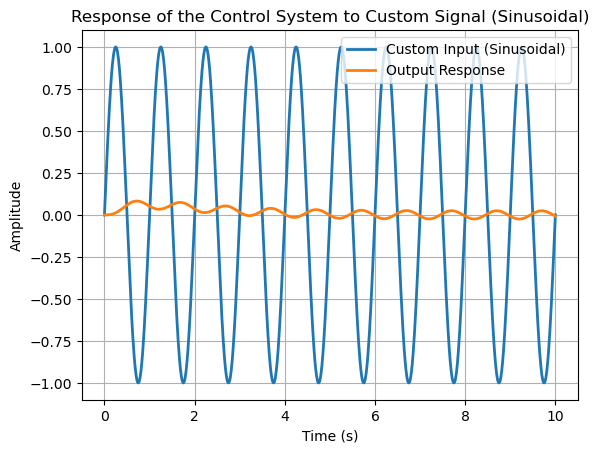

In [19]:
# Generate the custom input signal (example: sinusoidal signal)
t_custom = np.linspace(0, 10, 1000)
u_custom = np.sin(2 * np.pi * t_custom)

# Calculate the output response of the control system to the custom signal
t, y_custom = control.forced_response(sys, T=t_custom, U=u_custom)

# Plot both the input and output on one canvas
plt.plot(t_custom, u_custom, label='Custom Input (Sinusoidal)', linewidth=2)
plt.plot(t, y_custom, label='Output Response', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Response of the Control System to Custom Signal (Sinusoidal)')
plt.legend()
plt.grid(True)
plt.show()